In [110]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.optimizers import SGD,Adam
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

In [111]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

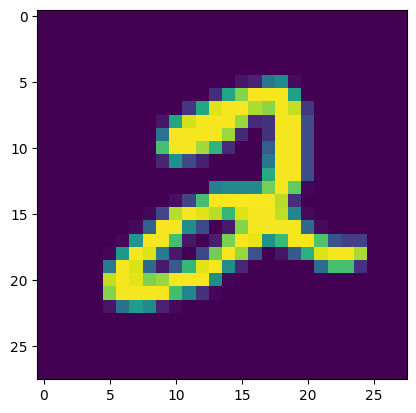

In [112]:
plt.imshow(X_train[5])
plt.show()

In [113]:
print(X_train.shape,X_test.shape)
X_train=X_train.reshape(X_train.shape[0],784)
X_test=X_test.reshape(X_test.shape[0],784)
X_train.shape,X_test.shape


(60000, 28, 28) (10000, 28, 28)


((60000, 784), (10000, 784))

In [114]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_train,y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [115]:
X_train=X_train/255
X_test=X_test/255

In [120]:
model=Sequential()
model.add(Input((784,)))
model.add(Dense(10,activation="softmax"))
# model.add(Dense())
model.summary()
model.compile(optimizer=Adam(learning_rate=0.01),loss="categorical_crossentropy",metrics=['accuracy'])
# callbacks=ModelCheckpoint

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# cp=ModelCheckpoint("my_model.keras",save_best_only=True,mode="min")
res=model.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8660 - loss: 0.4580 - val_accuracy: 0.9109 - val_loss: 0.3266
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9115 - loss: 0.3305 - val_accuracy: 0.9118 - val_loss: 0.3182
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9120 - loss: 0.3260 - val_accuracy: 0.9095 - val_loss: 0.3579
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9160 - loss: 0.3027 - val_accuracy: 0.9009 - val_loss: 0.3770
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9151 - loss: 0.3129 - val_accuracy: 0.9130 - val_loss: 0.3390
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9175 - loss: 0.3078 - val_accuracy: 0.9148 - val_loss: 0.3396
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.9138 - loss: 0.3216 - val_accuracy: 0.9121 - val_loss: 0.3467
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9133 - loss: 0.316

In [118]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8995 - loss: 0.4397  


[0.397697776556015, 0.9121999740600586]

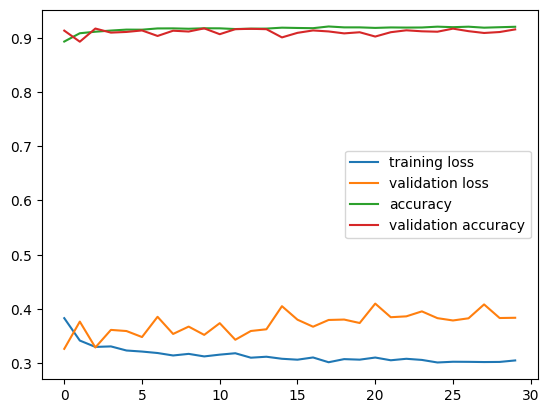

In [119]:
plt.plot(res.history["loss"],label="training loss")
plt.plot(res.history["val_loss"],label="validation loss")
plt.plot(res.history["accuracy"],label="accuracy")
plt.plot(res.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()